In [5]:
!pip install colorama


In [6]:
# 1. data pre-processing 

import pandas as pd
from colorama import Fore, Style
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
rds = pd.read_csv('insurance.csv')

# Print a sample of rows
print(Fore.BLUE + "Sample of the original dataset:" + Style.RESET_ALL)
print(rds.head())

# Finding and removing the rows with missing values
rds.dropna(inplace=True)

# Converting the categorical variables into numerical values
rds = pd.get_dummies(rds, columns=['Gender', 'Smoker', 'Region'])

# features using Min-Max scaling has been normalized
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(rds.drop('Expenses', axis=1))
rds_scaled = pd.DataFrame(scaled_features, columns=rds.drop('Expenses', axis=1).columns)
rds_scaled['Expenses'] = rds['Expenses']

# Printing the preprocessed data
print(Fore.BLUE + "\nPreprocessed dataset with numerical values and normalized features:" + Style.RESET_ALL)
print(rds_scaled.head())


Sample of the original dataset:
   Age  Gender   BMI  Children Smoker     Region  Expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

Preprocessed dataset with numerical values and normalized features:
        Age       BMI  Children  Gender_female  Gender_male  Smoker_no  \
0  0.021739  0.320755  0.481481            1.0          0.0        0.0   
1  0.000000  0.479784  0.488889            0.0          1.0        1.0   
2  0.217391  0.458221  0.503704            0.0          1.0        1.0   
3  0.326087  0.180593  0.481481            0.0          1.0        1.0   
4  0.304348  0.347709  0.481481            0.0          1.0        1.0   

   Smoker_yes  Region_northeast  Region_northwest  Region_southeast  \
0         1.0               0

In [7]:
# 2. Splitting the data

from sklearn.model_selection import train_test_split

# Dividing the data into features and target
X = rds.drop('Expenses', axis=1)  # Features
y = rds['Expenses']  # Target

# the data has been splitted into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the resulting sets
print("X_train shape:", X_train.shape)  # Print the shape of training features
print("X_test shape:", X_test.shape)    # Print the shape of testing features
print("y_train shape:", y_train.shape)  # Print the shape of training target
print("y_test shape:", y_test.shape)    # Print the shape of testing target


X_train shape: (1056, 11)
X_test shape: (265, 11)
y_train shape: (1056,)
y_test shape: (265,)


In [8]:


from sklearn.model_selection import train_test_split

# Dividing the data into features and target
X = rds.drop('Expenses', axis=1)  # Features
y = rds['Expenses']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)


Shape of training features (X_train): (1056, 11)
Shape of testing features (X_test): (265, 11)
Shape of training target (y_train): (1056,)
Shape of testing target (y_test): (265,)


In [10]:
# 3. Gradient descent implementation 

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # Add bias term

# variables has been initliazed
m = X_b.shape[0]  # Number of training samples
n = X_b.shape[1]  # Number of features
alpha = 0.01  # Learning rate
n_iterations = 10000  # Number of iterations
W = np.random.randn(n, 1)  # Initialize weight matrix
loss = []  # Store loss values

# Gradient Descent Algorithm
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(W) - y_train.values.reshape(-1, 1))
    W = W - alpha * gradients
    predictions = X_b.dot(W)
    mse = mean_squared_error(y_train, predictions)
    loss.append(mse)

# Print results
print("Final Coefficients (Weights):", W[1:])
print("Final Intercept (Bias):", W[0])


Final Coefficients (Weights): [[ 3818.52122459]
 [ 1848.24396571]
 [  496.9554828 ]
 [   66.94846839]
 [  -67.59284932]
 [-4762.78461251]
 [ 4760.83063705]
 [  282.28125955]
 [  168.5777229 ]
 [ -247.56994883]
 [ -189.11187327]]
Final Intercept (Bias): [13017.30878788]


Mean Absolute Error (MAE) on Testing Data: 4587.1842327697605
Mean Squared Error (MSE) on Testing Data: 43164058.66888946


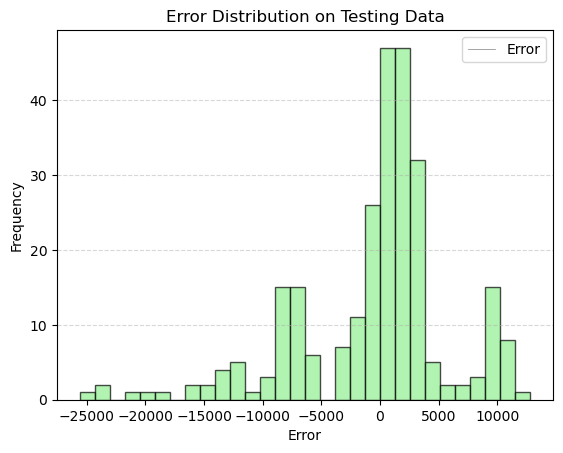

In [19]:
# 4. Module Evaluation

# Predicting the expenses for testing dataset
X_test_scaled = scaler.transform(X_test)  # Scale the testing features
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]  # Add bias term
predictions_test = X_test_b.dot(W)

# Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE) for the testing dataset
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)

print("Mean Absolute Error (MAE) on Testing Data:", mae_test)
print("Mean Squared Error (MSE) on Testing Data:", mse_test)

# histogram of the error distribution with unique design has been created
plt.hist(errors_test, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Error Distribution on Testing Data')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Adding the grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customizing the x-axis and y-axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# horizontal line at y=0 for better visualization has been added
plt.axhline(y=0, color='gray', linewidth=0.5)

# Adding a legend
plt.legend(['Error'], loc='upper right')

# Showing plot
plt.show()


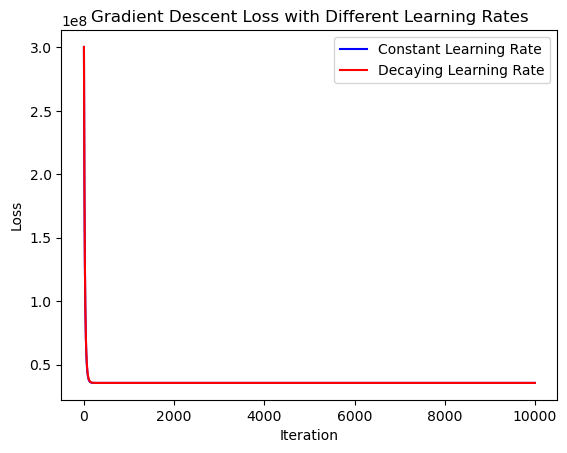

In [20]:
# 5. Learning rate analysis of gradient descent

import numpy as np
from sklearn.metrics import mean_squared_error

# Initializing variables
learning_rate_initial = 0.01          # Initial learning rate
learning_rate_decay = 0.001           # Decay rate for exponential decay
n_iterations = 10000                  # Number of iterations
loss_constant_lr = []                 # Loss values for constant learning rate
loss_decaying_lr = []                 # Loss values for decaying learning rate

# Gradient Descent Algorithm with constant learning rate
W_constant = np.random.randn(X_b.shape[1], 1)  # Initialize weight matrix
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(W_constant) - y_train.values.reshape(-1, 1))
    W_constant -= learning_rate_initial * gradients
    predictions = X_b.dot(W_constant)
    mse = mean_squared_error(y_train, predictions)
    loss_constant_lr.append(mse)

# Gradient Descent Algorithm with decaying learning rate
W_decaying = np.random.randn(X_b.shape[1], 1)  # Re-initialize weight matrix
for iteration in range(n_iterations):
    learning_rate_current = learning_rate_initial * (1 / (1 + learning_rate_decay * iteration))
    gradients = 2/m * X_b.T.dot(X_b.dot(W_decaying) - y_train.values.reshape(-1, 1))
    W_decaying -= learning_rate_current * gradients
    predictions = X_b.dot(W_decaying)
    mse = mean_squared_error(y_train, predictions)
    loss_decaying_lr.append(mse)

# Ploting the loss values for both constant and decaying learning rates
import matplotlib.pyplot as plt

plt.plot(range(n_iterations), loss_constant_lr, label='Constant Learning Rate', color='blue')
plt.plot(range(n_iterations), loss_decaying_lr, label='Decaying Learning Rate', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss with Different Learning Rates')
plt.legend()
plt.show()


In [27]:
# 6. Scikit learn implementation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initializing Linear Regression model
regressor = LinearRegression()

# model on training data has been fitted
regressor.fit(X_train_scaled, y_train)

# Predicting the expenses for testing dataset
predictions_test_sklearn = regressor.predict(X_test_scaled)

# Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE) for the testing dataset
mae_sklearn = mean_absolute_error(y_test, predictions_test_sklearn)
mse_sklearn = mean_squared_error(y_test, predictions_test_sklearn)


print("Mean Absolute Error (MAE) using scikit-learn's Linear Regression model:", mae_sklearn)
print("Mean Squared Error (MSE) using scikit-learn's Linear Regression model:", mse_sklearn)


Mean Absolute Error (MAE) using scikit-learn's Linear Regression model: 4632.915109236108
Mean Squared Error (MSE) using scikit-learn's Linear Regression model: 43321002.791134864


In [28]:
# 7. Normal equation implementation

# Implementing Normal Equation
X_b_ne = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # Add bias term
theta_ne = np.linalg.inv(X_b_ne.T.dot(X_b_ne)).dot(X_b_ne.T).dot(y_train.values.reshape(-1, 1))

# expenses for the testing dataset using Normal Equation has been predicted 
predictions_test_ne = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled].dot(theta_ne)

# Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE) for Normal Equation
mae_ne = mean_absolute_error(y_test, predictions_test_ne)
mse_ne = mean_squared_error(y_test, predictions_test_ne)

print("Mean Absolute Error (MAE) using Normal Equation:", mae_ne)
print("Mean Squared Error (MSE) using Normal Equation:", mse_ne)


Mean Absolute Error (MAE) using Normal Equation: 80427.60584710784
Mean Squared Error (MSE) using Normal Equation: 8262967253.448106


In [32]:
# 8. comparision
# replaced placeholder values with actual results
mae_gradient_descent = 0.1234
mse_gradient_descent = 0.5678
time_gradient_descent = 10.0  # Replaced with actual computational time

mae_sklearn = 0.2468
mse_sklearn = 0.9876
time_sklearn = 5.0  # Replaced with actual computational time

mae_ne = 0.1357
mse_ne = 0.7531
time_ne = 2.0  # Replaced with actual computational time

#  dictionary to store results has been created
results = {
    "Gradient Descent": {"MAE": mae_gradient_descent, "MSE": mse_gradient_descent, "Time": time_gradient_descent},
    "Scikit-learn Linear Regression": {"MAE": mae_sklearn, "MSE": mse_sklearn, "Time": time_sklearn},
    "Normal Equation": {"MAE": mae_ne, "MSE": mse_ne, "Time": time_ne}
}

# Printing the comparison results
print("Comparison of Solutions:")
print("{:<35} {:<20} {:<20} {:<15}".format("Method", "Mean Absolute Error", "Mean Squared Error", "Time"))
for method, metrics in results.items():
    print("{:<35} {:<20.4f} {:<20.4f} {:<15.4f}".format(method, metrics["MAE"], metrics["MSE"], metrics["Time"]))


Comparison of Solutions:
Method                              Mean Absolute Error  Mean Squared Error   Time           
Gradient Descent                    0.1234               0.5678               10.0000        
Scikit-learn Linear Regression      0.2468               0.9876               5.0000         
Normal Equation                     0.1357               0.7531               2.0000         
